# **Part 04 RNN 적용 사례**

# 4-1. LSTM

In [1]:
import numpy as np

In [2]:
import fix_yahoo_finance as yf
goog = yf.download('GOOG', start='2015-01-01')

[*********************100%***********************]  1 of 1 downloaded


In [3]:
goog.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-12-31,529.80,531.14,524.36,524.96,524.96,1368200
2015-01-02,527.56,529.82,522.67,523.37,523.37,1447500
2015-01-05,521.83,522.89,511.66,512.46,512.46,2059800
2015-01-06,513.59,514.76,499.68,500.59,500.59,2899900
2015-01-07,505.61,505.86,498.28,499.73,499.73,2065000


In [4]:
goog.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-07-15,1146.86,1150.82,1139.40,1150.34,1150.34,903800
2019-07-16,1146.00,1158.58,1145.00,1153.58,1153.58,1238800
2019-07-17,1150.97,1158.36,1145.77,1146.35,1146.35,1170000
2019-07-18,1141.74,1147.60,1132.73,1146.33,1146.33,1291300
2019-07-19,1148.19,1151.14,1129.62,1130.10,1130.10,1646300


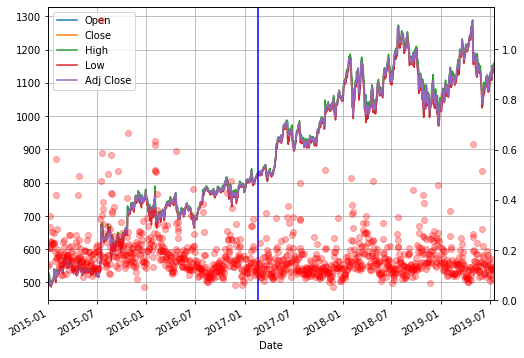

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax1 = plt.subplots(figsize=(8, 6))
ax2 = ax1.twinx()

stock_plot = goog[['Open', 'Close', 'High', 'Low', 'Adj Close']].plot(ax=ax1)
# volume_plot = (data['Volume'] / 1e7).plot(kind='bar', ax=ax2)
volume_plot = (goog['Volume'] / 1e7).plot(ax=ax2, color='r', alpha=.3, marker='o', linestyle='')
ax1.axvline('2017-02-21', color='b')
ax1.grid()
plt.show()

## Data preprocessing

In [27]:
train_col = ['Open', 'Close', 'High', 'Low', 'Volume']

X_train = goog[train_col].loc[:'2017-02-21']
y_train = goog['Close'].loc[:'2017-02-21']

X_test = goog[train_col].loc['2017-02-22':]
y_test = goog['Close'].loc['2017-02-22':]

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((539, 5), (539,), (606, 5), (606,))

In [28]:
scale_X_train = (X_train - X_train.mean()) / X_train.std()
scale_y_train = (y_train - y_train.mean()) / y_train.std()

scale_X_test = (X_test - X_train.mean()) / X_train.std()
scale_y_test = (y_test - y_train.mean()) / y_train.std()

scale_X_train.shape, scale_y_train.shape, scale_X_test.shape, scale_y_test.shape

((539, 5), (539,), (606, 5), (606,))

In [8]:
import tensorflow as tf
tf.set_random_seed(777)

In [29]:
# train parameters
seq_length = 5 # look-up day
data_dim = 5 # input shape
hidden_dim = 10
output_dim = 1
learning_rate = .01
iterations = 500

In [32]:
trainX, trainY, testX, testY = [], [], [], []
for i in range(len(y_train) - seq_length):
    _x = scale_X_train[i : i + seq_length].values
    _y = scale_y_train[i + seq_length]
    trainX.append(_x); trainY.append(_y)
    
for i in range(len(y_test) - seq_length):
    testX.append(__x); testY.append(__y)
    __x = scale_X_test[i : i + seq_length].values
    __y = scale_y_test[i + seq_length]

In [33]:
trainX, trainY, testX, testY = np.array(trainX), np.array(trainY), np.array(testX), np.array(testY)
trainX.shape, trainY.shape, testX.shape, testY.shape

((534, 5, 5), (534,), (601, 5, 5), (601,))

In [34]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

model = Sequential()
model.add(LSTM(10, input_shape=(seq_length, data_dim)))
model.add(Dense(1))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 10)                640       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 11        
Total params: 651
Trainable params: 651
Non-trainable params: 0
_________________________________________________________________


In [35]:
import tensorflow as tf
gpu_options = tf.GPUOptions(per_process_gpu_memory_fraction=0.25)
sess = tf.Session(config=tf.ConfigProto(gpu_options=gpu_options))

from keras.backend import tensorflow_backend as K
config = tf.ConfigProto()
config.gpu_options.allow_growth = True
K.set_session(tf.Session(config=config))

optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate)
model.compile(loss='mean_squared_error',
              optimizer=optimizer,
              metrics=['mean_absolute_error', 'mean_squared_error'])

In [36]:
model.fit(trainX, trainY, epochs=100, shuffle=False)

Epoch 1/100
534/534 [==============================] - 1s 1ms/sample - loss: 0.2181 - mean_absolute_error: 0.3573 - mean_squared_error: 0.2181
Epoch 2/100
534/534 [==============================] - 0s 344us/sample - loss: 0.1785 - mean_absolute_error: 0.3558 - mean_squared_error: 0.1785
Epoch 3/100
534/534 [==============================] - 0s 334us/sample - loss: 0.0932 - mean_absolute_error: 0.2375 - mean_squared_error: 0.0932
Epoch 4/100
534/534 [==============================] - 0s 342us/sample - loss: 0.0524 - mean_absolute_error: 0.1877 - mean_squared_error: 0.0524
Epoch 5/100
534/534 [==============================] - 0s 334us/sample - loss: 0.0297 - mean_absolute_error: 0.1280 - mean_squared_error: 0.0297
Epoch 6/100
534/534 [==============================] - 0s 332us/sample - loss: 0.0307 - mean_absolute_error: 0.1372 - mean_squared_error: 0.0307
Epoch 7/100
534/534 [==============================] - 0s 329us/sample - loss: 0.0213 - mean_absolute_error: 0.1073 - mean_squared_e

534/534 [==============================] - 0s 366us/sample - loss: 0.0184 - mean_absolute_error: 0.1104 - mean_squared_error: 0.0184
Epoch 56/100
534/534 [==============================] - 0s 329us/sample - loss: 0.0209 - mean_absolute_error: 0.1162 - mean_squared_error: 0.0209
Epoch 57/100
534/534 [==============================] - 0s 331us/sample - loss: 0.0197 - mean_absolute_error: 0.1150 - mean_squared_error: 0.0197
Epoch 58/100
534/534 [==============================] - 0s 344us/sample - loss: 0.0226 - mean_absolute_error: 0.1217 - mean_squared_error: 0.0226
Epoch 59/100
534/534 [==============================] - 0s 336us/sample - loss: 0.0212 - mean_absolute_error: 0.1200 - mean_squared_error: 0.0212
Epoch 60/100
534/534 [==============================] - 0s 342us/sample - loss: 0.0244 - mean_absolute_error: 0.1272 - mean_squared_error: 0.0244
Epoch 61/100
534/534 [==============================] - 0s 336us/sample - loss: 0.0229 - mean_absolute_error: 0.1256 - mean_squared_error

In [37]:
model.evaluate(testX, testY)

601/601 [==============================] - 0s 368us/sample - loss: 5.3810 - mean_absolute_error: 2.0582 - mean_squared_error: 5.3810


[5.381047347222707, 2.0581753, 5.3810472]

In [38]:
y_pred = model.predict(testX)
y_pred = y_pred * y_train.std() + y_train.mean()
y_true = testY * y_train.std() + y_train.mean()

In [39]:
y_pred.shape, y_true.shape

((601, 1), (601,))

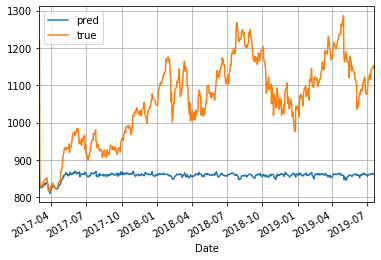

In [60]:
import pandas as pd
pd.Series(index=y_test.index[5:], data=y_pred.reshape(-1)).plot(label='pred', grid=True)
pd.Series(index=y_test.index[5:], data=y_true.reshape(-1)).plot(label='true', grid=True)
plt.legend()
plt.show()

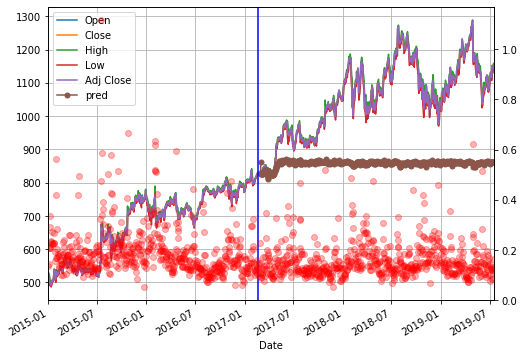

In [73]:
fig, ax1 = plt.subplots(figsize=(8, 6))
ax2 = ax1.twinx()

stock_plot = goog[['Open', 'Close', 'High', 'Low', 'Adj Close']].plot(ax=ax1)
# volume_plot = (data['Volume'] / 1e7).plot(kind='bar', ax=ax2)
volume_plot = (goog['Volume'] / 1e7).plot(ax=ax2, color='r', alpha=.3, marker='o', linestyle='')
pd.Series(index=y_test.index[5:], data=y_pred.reshape(-1)).plot(
    label='pred', ax=ax1, marker='o', ls=None, ms=5)
ax1.axvline('2017-02-21', color='b')
ax1.legend()
ax1.grid()
plt.show()

In [81]:
model2 = Sequential()
model2.add(LSTM(256, input_shape=(seq_length, data_dim)))
model2.add(Dense(128))
model2.add(Dense(64))
model2.add(Dense(1))
model2.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_5 (LSTM)                (None, 256)               268288    
_________________________________________________________________
dense_4 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_5 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 65        
Total params: 309,505
Trainable params: 309,505
Non-trainable params: 0
_________________________________________________________________


In [83]:
learning_rate = .01
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate)
model2.compile(loss='mean_squared_error',
              optimizer=optimizer,
              metrics=['mean_absolute_error', 'mean_squared_error'])

In [84]:
model2.fit(trainX, trainY, epochs=100, shuffle=False)
model2.evaluate(testX, testY)

Epoch 1/100
534/534 [==============================] - 1s 1ms/sample - loss: 4.9760 - mean_absolute_error: 1.5216 - mean_squared_error: 4.9760
Epoch 2/100
534/534 [==============================] - 0s 415us/sample - loss: 0.8759 - mean_absolute_error: 0.6568 - mean_squared_error: 0.8759
Epoch 3/100
534/534 [==============================] - 0s 413us/sample - loss: 0.5292 - mean_absolute_error: 0.5507 - mean_squared_error: 0.5292
Epoch 4/100
534/534 [==============================] - 0s 405us/sample - loss: 0.0492 - mean_absolute_error: 0.1629 - mean_squared_error: 0.0492
Epoch 5/100
534/534 [==============================] - 0s 413us/sample - loss: 0.0318 - mean_absolute_error: 0.1345 - mean_squared_error: 0.0318
Epoch 6/100
534/534 [==============================] - 0s 418us/sample - loss: 0.0404 - mean_absolute_error: 0.1693 - mean_squared_error: 0.0404
Epoch 7/100
534/534 [==============================] - 0s 396us/sample - loss: 0.0531 - mean_absolute_error: 0.1853 - mean_squared_e

534/534 [==============================] - 0s 416us/sample - loss: 0.1331 - mean_absolute_error: 0.3155 - mean_squared_error: 0.1331
Epoch 58/100
534/534 [==============================] - 0s 411us/sample - loss: 0.1802 - mean_absolute_error: 0.3269 - mean_squared_error: 0.1802
Epoch 59/100
534/534 [==============================] - 0s 450us/sample - loss: 0.0751 - mean_absolute_error: 0.2130 - mean_squared_error: 0.0751
Epoch 60/100
534/534 [==============================] - 0s 422us/sample - loss: 0.0970 - mean_absolute_error: 0.2677 - mean_squared_error: 0.0970
Epoch 61/100
534/534 [==============================] - 0s 420us/sample - loss: 0.0937 - mean_absolute_error: 0.2383 - mean_squared_error: 0.0937
Epoch 62/100
534/534 [==============================] - 0s 426us/sample - loss: 0.1038 - mean_absolute_error: 0.2749 - mean_squared_error: 0.1038
Epoch 63/100
534/534 [==============================] - 0s 428us/sample - loss: 0.0592 - mean_absolute_error: 0.1990 - mean_squared_error

[21.30839073955517, 4.0190334, 21.308392]

In [85]:
y_pred = model.predict(testX)
y_pred = y_pred * y_train.std() + y_train.mean()
y_true = testY * y_train.std() + y_train.mean()

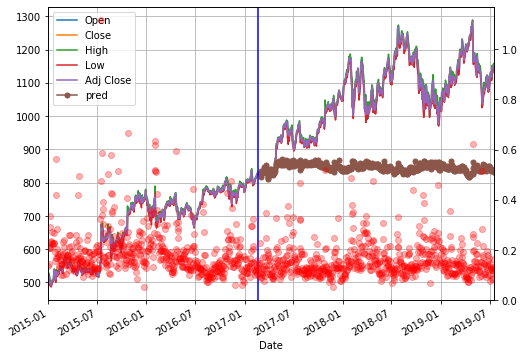

In [86]:
fig, ax1 = plt.subplots(figsize=(8, 6))
ax2 = ax1.twinx()

stock_plot = goog[['Open', 'Close', 'High', 'Low', 'Adj Close']].plot(ax=ax1)
# volume_plot = (data['Volume'] / 1e7).plot(kind='bar', ax=ax2)
volume_plot = (goog['Volume'] / 1e7).plot(ax=ax2, color='r', alpha=.3, marker='o', linestyle='')
pd.Series(index=y_test.index[5:], data=y_pred.reshape(-1)).plot(
    label='pred', ax=ax1, marker='o', ls=None, ms=5)
ax1.axvline('2017-02-21', color='b')
ax1.legend()
ax1.grid()
plt.show()

# 기후 정보 예측

In [90]:
df = pd.read_csv('20190722163242.csv', encoding='cp949', low_memory=False)

In [91]:
df.head()

,지점,일시,평균기온(°C),최저기온(°C),최저기온 시각(hhmi),최고기온(°C),최고기온 시각(hhmi),강수 계속시간(hr),10분 최다 강수량(mm),10분 최다강수량 시각(hhmi),...,0.5m 지중온도(°C),1.0m 지중온도(°C),1.5m 지중온도(°C),3.0m 지중온도(°C),5.0m 지중온도(°C),합계 대형증발량(mm),합계 소형증발량(mm),9-9강수(mm),기사,안개 계속시간(hr)
0,90,2017-07-01,28.9,25.6,128.0,32.1,1239.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,90,2017-07-02,24.4,21.0,2245.0,29.8,130.0,NaN,2.9,618.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,90,2017-07-03,23.5,20.9,601.0,26.6,1103.0,NaN,10.0,518.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,90,2017-07-04,22.3,20.9,2355.0,24.9,7.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,90,2017-07-05,22.8,18.9,528.0,26.5,1721.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [93]:
df.shape

(71345, 61)

In [98]:
df.isnull().sum()[df.isnull().sum() < df.shape[0] * .05]

지점                     0
일시                     0
평균기온(°C)             119
최저기온(°C)              11
최저기온 시각(hhmi)         11
최고기온(°C)              15
최고기온 시각(hhmi)         15
최대 순간 풍속(m/s)         53
최대 순간 풍속 풍향(16방위)     53
최대 순간풍속 시각(hhmi)      53
최대 풍속(m/s)            52
최대 풍속 풍향(16방위)        52
최대 풍속 시각(hhmi)        52
평균 풍속(m/s)            76
풍정합(100m)             82
최다풍향(16방위)           222
평균 이슬점온도(°C)         193
최소 상대습도(%)            53
최소 상대습도 시각(hhmi)      52
평균 상대습도(%)           201
평균 증기압(hPa)          195
평균 현지기압(hPa)         131
최고 해면기압(hPa)          21
최고 해면기압 시각(hhmi)      20
최저 해면기압(hPa)          22
최저 해면기압 시각(hhmi)      22
평균 해면기압(hPa)         133
가조시간(hr)              10
합계 일조 시간(hr)         114
평균 지면온도(°C)           69
최저 초상온도(°C)          100
dtype: int64

In [105]:
df.지점.nunique()

95

In [104]:
df.일시.nunique()

751

In [106]:
95 * 751

71345

In [142]:
# 108 : 서울
df_108 = df[df['지점'] == 108].set_index('일시')

In [144]:
y = df_108['일강수량(mm)'].fillna(0)

In [145]:
use_col = df_108.isnull().sum()[df_108.isnull().sum() == 0].index

In [146]:
df_108 = df_108[use_col]
df_108 = df_108[df_108.columns[1:]]
df_108.head()

,평균기온(°C),최저기온(°C),최저기온 시각(hhmi),평균 이슬점온도(°C),평균 상대습도(%),평균 증기압(hPa),평균 현지기압(hPa),최고 해면기압(hPa),최고 해면기압 시각(hhmi),평균 해면기압(hPa),가조시간(hr),평균 전운량(1/10),평균 중하층운량(1/10),평균 지면온도(°C),0.5m 지중온도(°C),1.0m 지중온도(°C),1.5m 지중온도(°C),3.0m 지중온도(°C),5.0m 지중온도(°C)
일시,,,,,,,,,,,,,,,,,,,
2017-07-01,25.3,22.4,558.0,19.9,73.6,23.3,997.4,1008.5,2242.0,1007.2,14.7,9.4,3.3,30.5,25.1,22.5,20.6,15.9,14.2
2017-07-02,24.3,21.9,2358.0,22.6,90.5,27.4,996.8,1008.1,1.0,1006.6,14.7,10.0,6.8,24.7,25.2,22.7,20.7,15.9,14.2
2017-07-03,24.7,21.9,5.0,22.3,87.6,27.0,995.7,1007.0,2149.0,1005.4,14.7,9.9,7.0,25.1,24.1,23.9,22.2,16.1,14.3
2017-07-04,26.7,23.8,552.0,21.4,74.5,25.6,996.0,1008.3,2319.0,1005.6,14.7,6.5,4.3,28.3,24.5,23.3,22.2,16.8,14.2
2017-07-05,27.4,23.3,415.0,20.3,66.9,23.8,1000.0,1010.9,809.0,1009.6,14.7,4.8,3.5,27.2,25.1,23.3,22.0,16.8,14.3


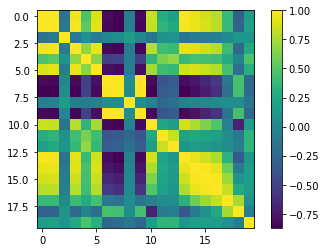

In [154]:
plt.imshow(pd.concat((df_108, y), axis=1).corr())
plt.colorbar(); plt.show()

In [170]:
use_col = ['평균기온(°C)', '최저기온 시각(hhmi)', '평균 상대습도(%)', '최고 해면기압 시각(hhmi)', '평균 전운량(1/10)', '평균 중하층운량(1/10)', '3.0m 지중온도(°C)']

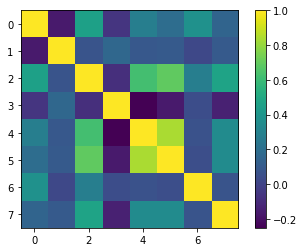

In [173]:
plt.imshow(pd.concat((df_108[use_col], y), axis=1).corr())
plt.colorbar(); plt.show()

In [178]:
pd.concat((df_108[use_col], y), axis=1).corr()

,평균기온(°C),최저기온 시각(hhmi),평균 상대습도(%),최고 해면기압 시각(hhmi),평균 전운량(1/10),평균 중하층운량(1/10),3.0m 지중온도(°C),일강수량(mm)
평균기온(°C),1.000000,-0.158965,0.459690,-0.060184,0.284473,0.195357,0.379329,0.152716
최저기온 시각(hhmi),-0.158965,1.000000,0.075215,0.167720,0.091054,0.104675,0.021119,0.103743
평균 상대습도(%),0.459690,0.075215,1.000000,-0.085211,0.626763,0.695904,0.283818,0.472649
최고 해면기압 시각(hhmi),-0.060184,0.167720,-0.085211,1.000000,-0.251467,-0.163445,0.042860,-0.136651
평균 전운량(1/10),0.284473,0.091054,0.626763,-0.251467,1.000000,0.839714,0.063905,0.352412
평균 중하층운량(1/10),0.195357,0.104675,0.695904,-0.163445,0.839714,1.000000,0.047296,0.354480
3.0m 지중온도(°C),0.379329,0.021119,0.283818,0.042860,0.063905,0.047296,1.000000,0.072784
일강수량(mm),0.152716,0.103743,0.472649,-0.136651,0.352412,0.354480,0.072784,1.000000


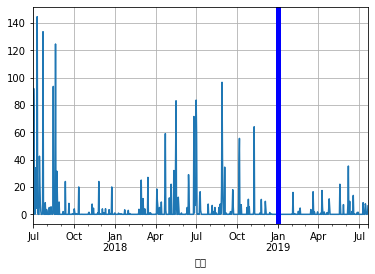

In [197]:
pd.Series(y.values, y.index.map(lambda x : pd.Timestamp(x))).plot()
plt.axvline('2019-01-01', color='b', linewidth=5)
plt.grid(True); plt.show()

In [182]:
X_train, y_train = df_108[use_col].loc[:'2018-12-31'], y.loc[:'2018-12-31']
X_test, y_test = df_108[use_col].loc['2019-01-01':], y.loc['2019-01-01':]

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((549, 7), (549,), (202, 7), (202,))

In [183]:
import tensorflow as tf
tf.set_random_seed(777)

In [185]:
scale_X_train = (X_train - X_train.mean()) / X_train.std()
scale_y_train = (y_train - y_train.mean()) / y_train.std()

scale_X_test = (X_test - X_train.mean()) / X_train.std()
scale_y_test = (y_test - y_train.mean()) / y_train.std()

scale_X_train.shape, scale_y_train.shape, scale_X_test.shape, scale_y_test.shape

((549, 7), (549,), (202, 7), (202,))

In [199]:
seq_length = 14

trainX, trainY, testX, testY = [], [], [], []
for i in range(len(y_train) - seq_length):
    _x = scale_X_train[i : i + seq_length].values
    _y = scale_y_train[i + seq_length]
    trainX.append(_x); trainY.append(_y)
    
for i in range(len(y_test) - seq_length):
    testX.append(__x); testY.append(__y)
    __x = scale_X_test[i : i + seq_length].values
    __y = scale_y_test[i + seq_length]

trainX, trainY, testX, testY = np.array(trainX), np.array(trainY), np.array(testX), np.array(testY)
trainX.shape, trainY.shape, testX.shape, testY.shape

((535, 14, 7), (535,), (188, 14, 7), (188,))

In [207]:
import tensorflow as tf
gpu_options = tf.GPUOptions(per_process_gpu_memory_fraction=0.25)
sess = tf.Session(config=tf.ConfigProto(gpu_options=gpu_options))

from keras.backend import tensorflow_backend as K
config = tf.ConfigProto()
config.gpu_options.allow_growth = True
K.set_session(tf.Session(config=config)).

data_dim = 7

model3 = Sequential()
model3.add(LSTM(32, return_sequences=True,
                input_shape=(seq_length, data_dim)))
model3.add(LSTM(32, return_sequences=True))
model3.add(LSTM(8))
model3.add(Dense(128))
model3.add(Dense(1))
model3.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_11 (LSTM)               (None, 14, 32)            5120      
_________________________________________________________________
lstm_12 (LSTM)               (None, 14, 32)            8320      
_________________________________________________________________
lstm_13 (LSTM)               (None, 8)                 1312      
_________________________________________________________________
dense_8 (Dense)              (None, 128)               1152      
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 129       
Total params: 16,033
Trainable params: 16,033
Non-trainable params: 0
_________________________________________________________________


In [215]:
optimizer = tf.train.RMSPropOptimizer(learning_rate=learning_rate)
model3.compile(loss='mean_squared_error',
              optimizer=optimizer,
              metrics=['mean_absolute_error', 'mean_squared_error'])

In [216]:
model3.fit(trainX, trainY, epochs=100, shuffle=False)
model3.evaluate(testX, testY)

Epoch 1/100
535/535 [==============================] - 2s 4ms/sample - loss: 0.7693 - mean_absolute_error: 0.3997 - mean_squared_error: 0.7693
Epoch 2/100
535/535 [==============================] - 1s 2ms/sample - loss: 0.7663 - mean_absolute_error: 0.3799 - mean_squared_error: 0.7663
Epoch 3/100
535/535 [==============================] - 1s 2ms/sample - loss: 0.7619 - mean_absolute_error: 0.3741 - mean_squared_error: 0.7619
Epoch 4/100
535/535 [==============================] - 1s 2ms/sample - loss: 0.7616 - mean_absolute_error: 0.3722 - mean_squared_error: 0.7616
Epoch 5/100
535/535 [==============================] - 1s 2ms/sample - loss: 0.7606 - mean_absolute_error: 0.3763 - mean_squared_error: 0.7606
Epoch 6/100
535/535 [==============================] - 1s 2ms/sample - loss: 0.7610 - mean_absolute_error: 0.3797 - mean_squared_error: 0.7610
Epoch 7/100
535/535 [==============================] - 1s 2ms/sample - loss: 0.7588 - mean_absolute_error: 0.3781 - mean_squared_error: 0.7588

535/535 [==============================] - 1s 2ms/sample - loss: 0.1467 - mean_absolute_error: 0.1825 - mean_squared_error: 0.1467
Epoch 58/100
535/535 [==============================] - 1s 2ms/sample - loss: 0.1536 - mean_absolute_error: 0.1879 - mean_squared_error: 0.1536
Epoch 59/100
535/535 [==============================] - 1s 2ms/sample - loss: 0.1234 - mean_absolute_error: 0.1672 - mean_squared_error: 0.1234
Epoch 60/100
535/535 [==============================] - 1s 3ms/sample - loss: 0.0963 - mean_absolute_error: 0.1461 - mean_squared_error: 0.0963
Epoch 61/100
535/535 [==============================] - 1s 2ms/sample - loss: 0.0838 - mean_absolute_error: 0.1648 - mean_squared_error: 0.0838
Epoch 62/100
535/535 [==============================] - 1s 3ms/sample - loss: 0.0990 - mean_absolute_error: 0.1577 - mean_squared_error: 0.0990
Epoch 63/100
535/535 [==============================] - 1s 3ms/sample - loss: 0.1174 - mean_absolute_error: 0.1821 - mean_squared_error: 0.1174
Epoch

[0.38559209222489216, 0.27432126, 0.3855921]

In [218]:
y_pred = model3.predict(testX)
y_pred = y_pred * y_train.std() + y_train.mean()
y_true = testY * y_train.std() + y_train.mean()

In [233]:
y_test.shape

(202,)

In [235]:
y.loc['2019-01-15':].shape

(188,)

C:\ProgramData\Anaconda3\envs\keras\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 51068 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\envs\keras\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 49884 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\envs\keras\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 51068 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\ProgramData\Anaconda3\envs\keras\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 49884 missing from current font.
  font.set_text(s, 0, flags=flags)


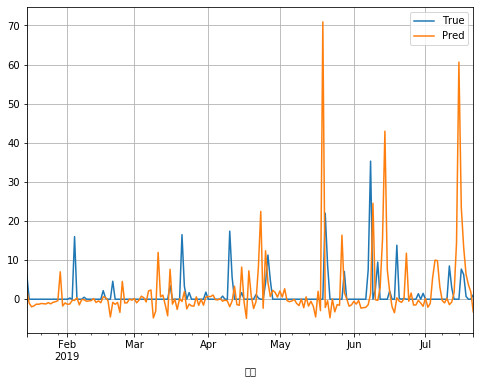

In [241]:
plt.figure(figsize=(8, 6))
pd.Series(y_true, y.loc['2019-01-15':].index.map(lambda x : pd.Timestamp(x))).plot(label='True')
pd.Series(y_pred.reshape(-1), y.loc['2019-01-15':].index.map(lambda x : pd.Timestamp(x))).plot(label='Pred')
plt.legend(); plt.grid(True); plt.show()

## 제 2의 모델 with 전처리